# Data Wrangling

In this project, I will be looking at COVID information from Mexico to predict high risk patients and then find where the best locations to send supplies. 

This data was found on Kaggle and originates from the Mexican Government General Directorate of Epidemiology

(https://www.kaggle.com/datasets/marianarfranklin/mexico-covid19-clinical-data)

(https://www.gob.mx/salud/documentos/datos-abiertos-152127)

In [1]:
#Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('221227COVID19MEXICO.csv')

C:\Users\aykal\AppData\Local\Temp\ipykernel_21824\3336534998.py:1: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('221227COVID19MEXICO.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6330966 entries, 0 to 6330965
Data columns (total 40 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   FECHA_ACTUALIZACION    object
 1   ID_REGISTRO            object
 2   ORIGEN                 int64 
 3   SECTOR                 int64 
 4   ENTIDAD_UM             int64 
 5   SEXO                   int64 
 6   ENTIDAD_NAC            int64 
 7   ENTIDAD_RES            int64 
 8   MUNICIPIO_RES          int64 
 9   TIPO_PACIENTE          int64 
 10  FECHA_INGRESO          object
 11  FECHA_SINTOMAS         object
 12  FECHA_DEF              object
 13  INTUBADO               int64 
 14  NEUMONIA               int64 
 15  EDAD                   int64 
 16  NACIONALIDAD           int64 
 17  EMBARAZO               int64 
 18  HABLA_LENGUA_INDIG     int64 
 19  INDIGENA               int64 
 20  DIABETES               int64 
 21  EPOC                   int64 
 22  ASMA                   int64 
 23  INMUSUP

This project starts out with 6330966 rows and 40 columns

In [4]:
df.head(5)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2022-12-27,10e0db,1,12,20,2,20,20,67,1,...,1,2,97,1,2,7,99,México,97,97
1,2022-12-27,0989f5,2,12,14,1,32,14,71,1,...,2,2,97,1,1,3,99,México,97,97
2,2022-12-27,01e27d,2,9,25,2,25,25,1,1,...,2,2,97,1,2,7,99,México,97,97
3,2022-12-27,180725,2,9,9,2,9,9,12,2,...,2,2,97,1,2,7,99,México,97,2
4,2022-12-27,0793b8,2,12,9,2,9,9,10,1,...,2,2,97,1,2,7,99,México,97,97


In [5]:
cols = df.columns.values
cols

array(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR',
       'ENTIDAD_UM', 'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES',
       'MUNICIPIO_RES', 'TIPO_PACIENTE', 'FECHA_INGRESO',
       'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA', 'EDAD',
       'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO',
       'CLASIFICACION_FINAL', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI'], dtype=object)

I will rename the data to make it easier to refer back to each column and know what they are for. 

In [6]:
df2={}
df2 = df.rename(columns={
    'FECHA_ACTUALIZACION' : 'Updated Date', 
    'ID_REGISTRO' : 'Registration ID', 
    'ORIGEN':'Origin', 
    'SECTOR':'Sector',     
    'ENTIDAD_UM': 'Entity', 
    'SEXO':'Sex', 
    'ENTIDAD_NAC':'Birth Entity', 
    'ENTIDAD_RES':'Residence Entity', 
    'MUNICIPIO_RES':'Residence Municipality', 
    'TIPO_PACIENTE':'Patient Type', 
    'FECHA_INGRESO':'Date Entry',    
    'FECHA_SINTOMAS':'Date Symptoms', 
    'FECHA_DEF':'Date Died', 
    'INTUBADO':'Intubated', 
    'NEUMONIA':'Pneumonia', 
    'EDAD':'Age',
    'NACIONALIDAD':'Nationality', 
    'EMBARAZO':'Pregnant', 
    'HABLA_LENGUA_INDIG':'Language', 
    'INDIGENA':'Indigenous',   
    'DIABETES':'Diabetes', 
    'EPOC':'COPD', 
    'ASMA':'Asthma', 
    'INMUSUPR':'Immunosuppresed', 
    'HIPERTENSION':'Hypertension', 
    'OTRA_COM':'Other Disease',
    'CARDIOVASCULAR':'Cardiovascular', 
    'OBESIDAD':'Obesity', 
    'RENAL_CRONICA':'Chronic Kidney', 
    'TABAQUISMO':'Tobacco',
    'OTRO_CASO':'COVID Contact', 
    'TOMA_MUESTRA_LAB':'Lab Sample', 
    'RESULTADO_LAB':'Sample Result',   
    'TOMA_MUESTRA_ANTIGENO':'Antigen Sample', 
    'RESULTADO_ANTIGENO':'Antigen Result', 
    'CLASIFICACION_FINAL':'COVID', 
    'MIGRANTE':'Migrant', 
    'PAIS_NACIONALIDAD':'Previous Nationality',
    'PAIS_ORIGEN':'Previous Origin', 
    'UCI':'ICU'
    })

df2.head(5)

,Updated Date,Registration ID,Origin,Sector,Entity,Sex,Birth Entity,Residence Entity,Residence Municipality,Patient Type,...,COVID Contact,Lab Sample,Sample Result,Antigen Sample,Antigen Result,COVID,Migrant,Previous Nationality,Previous Origin,ICU
0,2022-12-27,10e0db,1,12,20,2,20,20,67,1,...,1,2,97,1,2,7,99,México,97,97
1,2022-12-27,0989f5,2,12,14,1,32,14,71,1,...,2,2,97,1,1,3,99,México,97,97
2,2022-12-27,01e27d,2,9,25,2,25,25,1,1,...,2,2,97,1,2,7,99,México,97,97
3,2022-12-27,180725,2,9,9,2,9,9,12,2,...,2,2,97,1,2,7,99,México,97,2
4,2022-12-27,0793b8,2,12,9,2,9,9,10,1,...,2,2,97,1,2,7,99,México,97,97


In [7]:
df2.nunique()

Updated Date                    1
Registration ID           6330966
Origin                          2
Sector                         14
Entity                         32
Sex                             2
Birth Entity                   33
Residence Entity               32
Residence Municipality        544
Patient Type                    2
Date Entry                    361
Date Symptoms                 360
Date Died                     361
Intubated                       4
Pneumonia                       3
Age                           128
Nationality                     2
Pregnant                        5
Language                        3
Indigenous                      3
Diabetes                        3
COPD                            3
Asthma                          3
Immunosuppresed                 3
Hypertension                    3
Other Disease                   3
Cardiovascular                  3
Obesity                         3
Chronic Kidney                  3
Tobacco       

In [8]:
for c in df2.columns:
   if len(df2[c].unique()) >= 3 and len(df2[c].unique()) <=10:
        print(df2[c].value_counts(normalize=True))

97    0.959521
2     0.038711
1     0.001737
99    0.000031
Name: Intubated, dtype: float64
2     0.972857
1     0.016839
99    0.010304
Name: Pneumonia, dtype: float64
2     0.547050
97    0.433519
1     0.013215
98    0.006215
99    0.000002
Name: Pregnant, dtype: float64
2     0.932837
99    0.062511
1     0.004653
Name: Language, dtype: float64
2     0.932412
99    0.061127
1     0.006461
Name: Indigenous, dtype: float64
2     0.936805
1     0.059159
98    0.004035
Name: Diabetes, dtype: float64
2     0.990699
1     0.005363
98    0.003937
Name: COPD, dtype: float64
2     0.977628
1     0.018456
98    0.003916
Name: Asthma, dtype: float64
2     0.990965
1     0.005113
98    0.003922
Name: Immunosuppresed, dtype: float64
2     0.912628
1     0.083453
98    0.003919
Name: Hypertension, dtype: float64
2     0.973397
98    0.015832
1     0.010770
Name: Other Disease, dtype: float64
2     0.987941
1     0.008136
98    0.003923
Name: Cardiovascular, dtype: float64
2     0.937888
1     0.

I can see here a few things we will have to adjust
1. the Updated Date only has one value, so we can drop that
2. The registration ID is diffferent for every row, so we might not be needing this either
3. Age has 128 different values, that doesnt seem right, we may need to look into this more 
4. We don't really need the columns stating where the patient came from, as we are wanting to find out where to send supplies would be to where the patient currently is
5. We can drop a lot more of the demographic data such as indigenous and language, as they are related to whether or not the patient can speak a language or are of native blood
6. We can drop Intubated and ICU because these are features that are not determinant for being high risk as these would mainly be occuring after being admitted. 
7. COVID results vary from 1-7, 1-3 being a positive test and 4-7 being a negative test or inconclusive. I will change this so that it will be a clear 1 for positive and 2 for negative. 


In [9]:
df2=df2.drop(['Updated Date', 'Language','Indigenous','Sector','Lab Sample','Antigen Sample','Migrant', 'Previous Origin','Birth Entity','Previous Nationality',], axis=1)

In [10]:
df2[df2.duplicated()==True]

,Registration ID,Origin,Entity,Sex,Residence Entity,Residence Municipality,Patient Type,Date Entry,Date Symptoms,Date Died,...,Other Disease,Cardiovascular,Obesity,Chronic Kidney,Tobacco,COVID Contact,Sample Result,Antigen Result,COVID,ICU


In [11]:
missing = pd.concat([df2.isnull().sum(), 100 * df2.isnull().mean()], axis=1)
missing.columns=['count','%']
missing.sort_values(by='count')

,count,%
Registration ID,0,0.0
Antigen Result,0,0.0
Sample Result,0,0.0
COVID Contact,0,0.0
Tobacco,0,0.0
Chronic Kidney,0,0.0
Obesity,0,0.0
Cardiovascular,0,0.0
Other Disease,0,0.0
Hypertension,0,0.0


No missing or duplicated values immediately seen, but this quick search just tells us that there is a value put in every data point. This makes sense as there are 6 million different registration numbers. 

However, the data follows the following rule for the values:

1 is yes

2 is no

97 is not applicable

98 is ignored

99 is unspecified

For many of the features, the values 97, 98 and 99 could be considered missing values. 

In [12]:
#Replace COVID values so that 1 is positive, 2 is negative
df2['COVID'] = df2['COVID'].replace([2,3], 1)
df2['COVID'] = df2['COVID'].replace([4,5,6,7], 2)

In [13]:
df2

,Registration ID,Origin,Entity,Sex,Residence Entity,Residence Municipality,Patient Type,Date Entry,Date Symptoms,Date Died,...,Other Disease,Cardiovascular,Obesity,Chronic Kidney,Tobacco,COVID Contact,Sample Result,Antigen Result,COVID,ICU
0,10e0db,1,20,2,20,67,1,2022-06-23,2022-06-21,9999-99-99,...,2,2,2,2,2,1,97,2,2,97
1,0989f5,2,14,1,14,71,1,2022-08-09,2022-08-06,9999-99-99,...,2,2,2,2,2,2,97,1,1,97
2,01e27d,2,25,2,25,1,1,2022-02-14,2022-02-14,9999-99-99,...,2,2,2,2,2,2,97,2,2,97
3,180725,2,9,2,9,12,2,2022-01-19,2022-01-17,9999-99-99,...,2,2,2,2,2,2,97,2,2,2
4,0793b8,2,9,2,9,10,1,2022-05-03,2022-05-03,9999-99-99,...,2,2,2,2,1,2,97,2,2,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6330961,m07fc81,2,15,2,15,999,1,2022-12-22,2022-12-22,9999-99-99,...,98,2,2,2,2,99,3,97,2,97
6330962,m101c2f,2,15,2,15,999,1,2022-12-22,2022-12-22,9999-99-99,...,98,2,2,2,2,99,1,97,1,97
6330963,m123829,2,15,2,15,999,1,2022-12-22,2022-12-22,9999-99-99,...,98,2,2,2,2,99,3,97,2,97
6330964,m0610a9,2,15,1,15,999,1,2022-12-23,2022-12-23,9999-99-99,...,98,2,2,2,2,99,97,97,2,97


I will now perform Chi-Square testing to find if there any relationships between our categorical variables 

Null Hypothesis = No difference or no relationship between "Classification Final" ( Whether the patient has COVID) and other features


Significance level = 0.05

If the P-Value is less than significance level, the hypothesis is rejected, meaning that there could be a relationship between the two features

In [14]:
import numpy as np
from scipy import stats 

In [15]:
compare = pd.crosstab(df['CLASIFICACION_FINAL'],df['OBESIDAD'])
print(compare)

OBESIDAD                 1        2      98
CLASIFICACION_FINAL                        
1                      4200    68968    337
2                        39      374      1
3                    201261  2852207  11328
4                        12      332      0
5                       546     8566     27
6                     10254   188798    677
7                    153059  2818490  11490


In [16]:
chi2, p, dof, ex=stats.chi2_contingency(compare)
print(f'Chi_square value: {chi2} \nP-Value: {p}\nDegrees of Freedom: {dof}\nExpected: {ex}')

Chi_square value: 5902.031143831834 
P-Value: 0.0
Degrees of Freedom: 12
Expected: [[4.28854228e+03 6.89394338e+04 2.77023964e+02]
 [2.41542276e+01 3.88285499e+02 1.56027374e+00]
 [1.78811063e+05 2.87443440e+06 1.15505331e+04]
 [2.00701795e+01 3.22633361e+02 1.29645934e+00]
 [5.33201658e+02 8.57135549e+03 3.44428544e+01]
 [1.16528979e+04 1.87323368e+05 7.52734091e+02]
 [1.74041070e+05 2.79775552e+06 1.12424092e+04]]


In [17]:
feature=[]
pvalue=[]

for c in df2.columns:
    if(df2[c].dtype == np.int64):
        compare = pd.crosstab(df2['COVID'],df2[c])
        chi2, p, dof, ex=stats.chi2_contingency(compare)
        pvalue.append(p)
        feature.append(c)

        df_pvalue = pd.DataFrame(list(zip(feature, pvalue)),columns=['feature','pvalue'])

In [18]:
df_pvalue

,feature,pvalue
0,Origin,0.000000e+00
1,Entity,0.000000e+00
2,Sex,1.686757e-95
3,Residence Entity,0.000000e+00
4,Residence Municipality,0.000000e+00
5,Patient Type,0.000000e+00
6,Intubated,0.000000e+00
7,Pneumonia,0.000000e+00
8,Age,0.000000e+00
9,Nationality,0.000000e+00


The Chi Square test showed that all of the features resulted in a P-value that was less than the significance level so the null hypothesis is rejected.

I will now use feature selection to isolate the top features

In [19]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from numpy import array

In [20]:
df3=df2.drop(['Registration ID','Date Entry','Date Symptoms','Date Died'],axis=1)

In [90]:
y=df3['COVID']
X=df3.drop(columns=['COVID'], axis=1)

select=SelectKBest(chi2,k=12)

In [91]:
new=select.fit_transform(X,y)

In [92]:
select.get_support()

array([False,  True, False,  True,  True, False,  True,  True,  True,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False,  True,  True,  True,  True])

In [93]:
select.get_feature_names_out(input_features=None)

array(['Entity', 'Residence Entity', 'Residence Municipality',
       'Intubated', 'Pneumonia', 'Age', 'Pregnant', 'Other Disease',
       'COVID Contact', 'Sample Result', 'Antigen Result', 'ICU'],
      dtype=object)

In [60]:
# I will check how many people actually tested positive
percent_positive = round(sum(df2['COVID'] == 1) / len(df2['COVID']), 4) * 100
print(percent_positive,"% of patients tested positive for COVID")

positive = df2[df2['COVID'] == 1]
print(positive.shape)

49.58 % of patients tested positive for COVID
(3138713, 31)


In [25]:
df2['Date Died'].value_counts()

9999-99-99    6290973
2022-02-02        695
2022-02-01        689
2022-01-30        656
2022-01-31        643
               ...   
2022-10-20         18
2022-11-09         18
2022-12-26         11
2022-01-02          5
2022-01-01          3
Name: Date Died, Length: 361, dtype: int64

In [26]:
#Creating a new column to state is a person has died or not, 0 for alive, 1 for died
df2['Death'] = [0 if each=="9999-99-99" else 1 for each in df2['Date Died']]

In [27]:
df2['Date Symptoms'].value_counts()

2022-01-10    133732
2022-01-17    104748
2022-01-11     98522
2022-01-12     94019
2022-01-18     88918
               ...  
2022-10-29      3230
2022-04-14      3203
2022-12-24      2292
2022-12-25      1382
2022-12-26       865
Name: Date Symptoms, Length: 360, dtype: int64

In [28]:
df2['Date Symptoms'] = pd.to_datetime(df2['Date Symptoms'])
df2['Date Entry'] = pd.to_datetime(df2['Date Entry'])

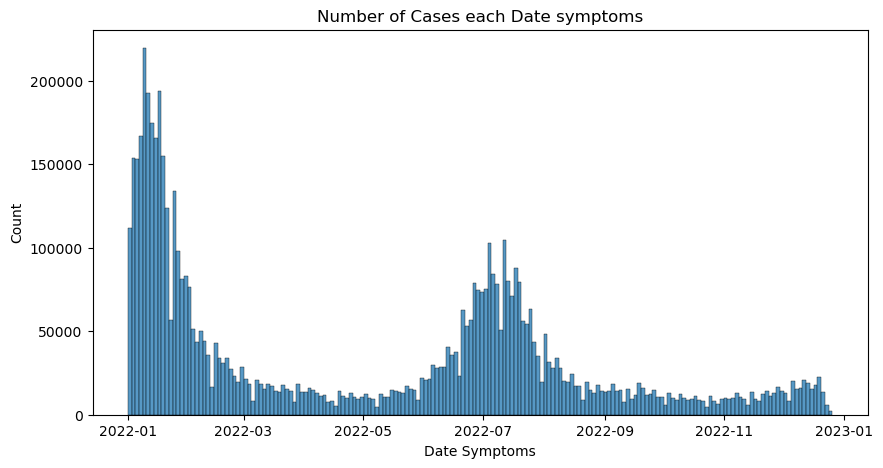

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(x=df2['Date Symptoms'])
plt.title("Number of Cases each Date symptoms");

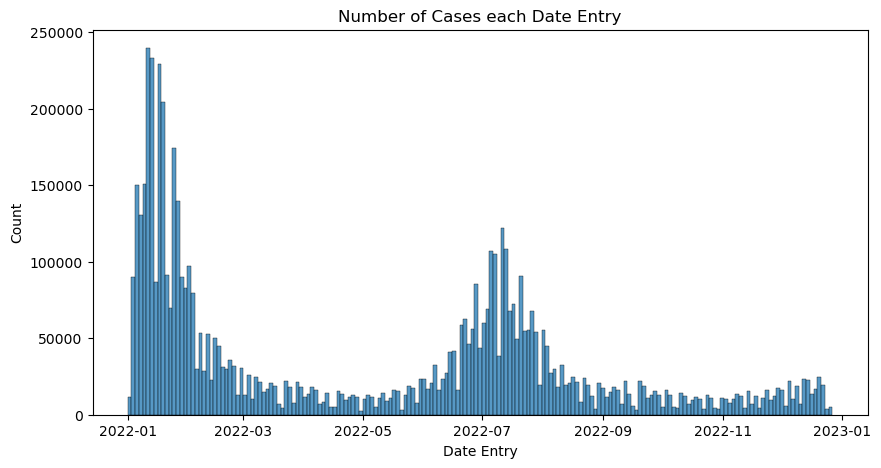

In [30]:
plt.figure(figsize=(10,5))
sns.histplot(x=df2['Date Entry'])
plt.title("Number of Cases each Date Entry");

In [31]:
deaths_1=df2.drop(df2[(df2['Date Died'] >= '9999-99-99')].index)

In [32]:
deaths_1['Date Died'] = pd.to_datetime(deaths_1['Date Died'])

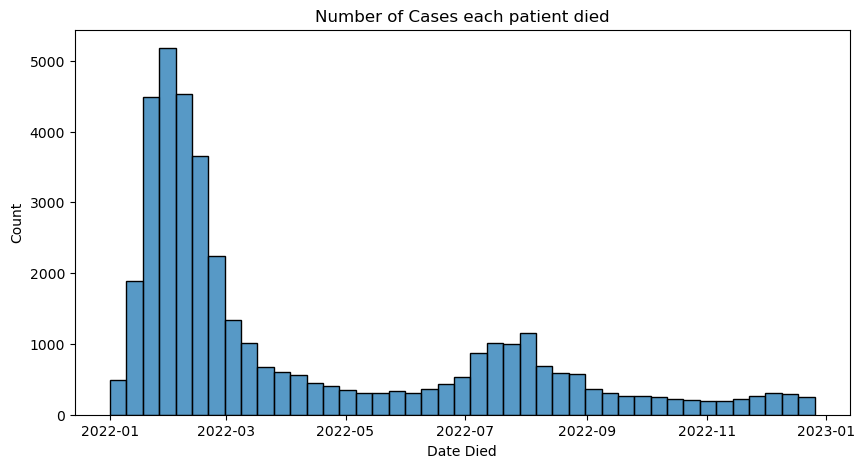

In [33]:
plt.figure(figsize=(10,5))
sns.histplot(x=deaths_1['Date Died'])
plt.title("Number of Cases each patient died");

In [35]:
deaths_1['COVID'].value_counts()

1    25188
2    14805
Name: COVID, dtype: int64

There were more values in the age column than expected, so I will focus on cleaning it up now. 

In [ ]:
df2['Age'].value_counts(ascending=True)

In [37]:
df2=df2[df2['Age']<130]

In [38]:
df2['Age'].value_counts(ascending=True)

118         7
116         7
121         7
120         9
117        10
        ...  
31     155322
29     160056
30     160585
27     160833
28     162414
Name: Age, Length: 123, dtype: int64

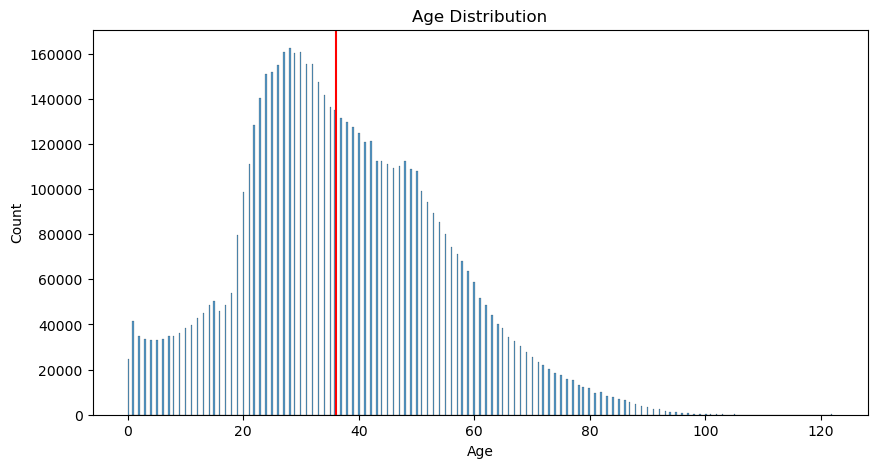

In [39]:
plt.figure(figsize=(10,5))
sns.histplot(x=df2['Age'])
plt.axvline(df2['Age'].median(), color='red')
plt.title("Age Distribution");

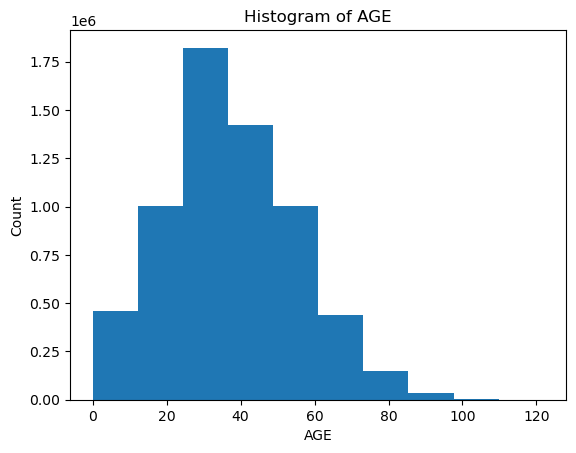

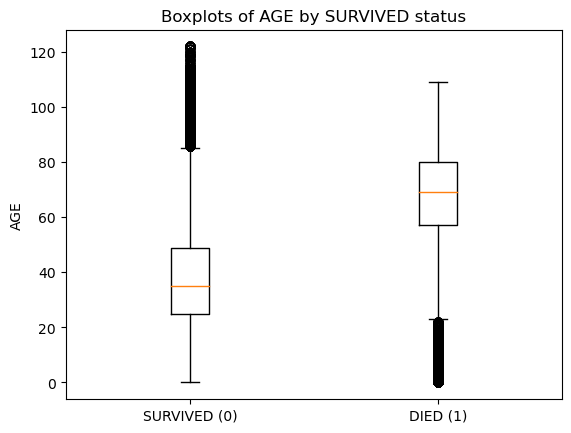


Mean age of all patients: 37.3 years

Mean age of those who survived: 37.1 years

Mean age of those who died: 66.1 years


In [89]:
plt.hist(df2.Age)
plt.xlabel("AGE")
plt.ylabel("Count")
plt.title("Histogram of AGE")
plt.show()

# Boxplots of AGE by SURVIVED status
AGE_SURVIVED = df2[df2.Death == 0].Age
AGE_DIED = df2[df2.Death == 1].Age
plt.boxplot(x=[AGE_SURVIVED, AGE_DIED], labels=['SURVIVED (0)', 'DIED (1)'])
plt.ylabel("AGE")
plt.title("Boxplots of AGE by SURVIVED status")
plt.show()

# Mean age for each group
print("\nMean age of all patients: {} years".format(round(sum(df2.Age) / 
                                                    len(df2.Age), 1)))
print("\nMean age of those who survived: {} years".format(round(sum(df2[df2.Death == 0].Age) /   
                                                                len(df2[df2.Death == 0].Age), 1)))
print("\nMean age of those who died: {} years".format(round(sum(df2[df2.Death == 1].Age) / 
                                                    len(df2[df2.Death == 1].Age), 1)))


In [43]:
# Number of people who survived / died and their percentages
survived = sum(df2['Death'] == 0)
survived_percent = round(survived / len(df2['Death']), 4) * 100
died = sum(df2['Death'] == 1)
died_percent = round(died /len(df2['Death']), 4) * 100

print("{} people ({}%) survived COVID-19 infection.".format(survived, survived_percent))
print("{} people ({}%) died of COVID-19 infection.".format(died, died_percent))

6290968 people (99.37%) survived COVID-19 infection.
39993 people (0.63%) died of COVID-19 infection.


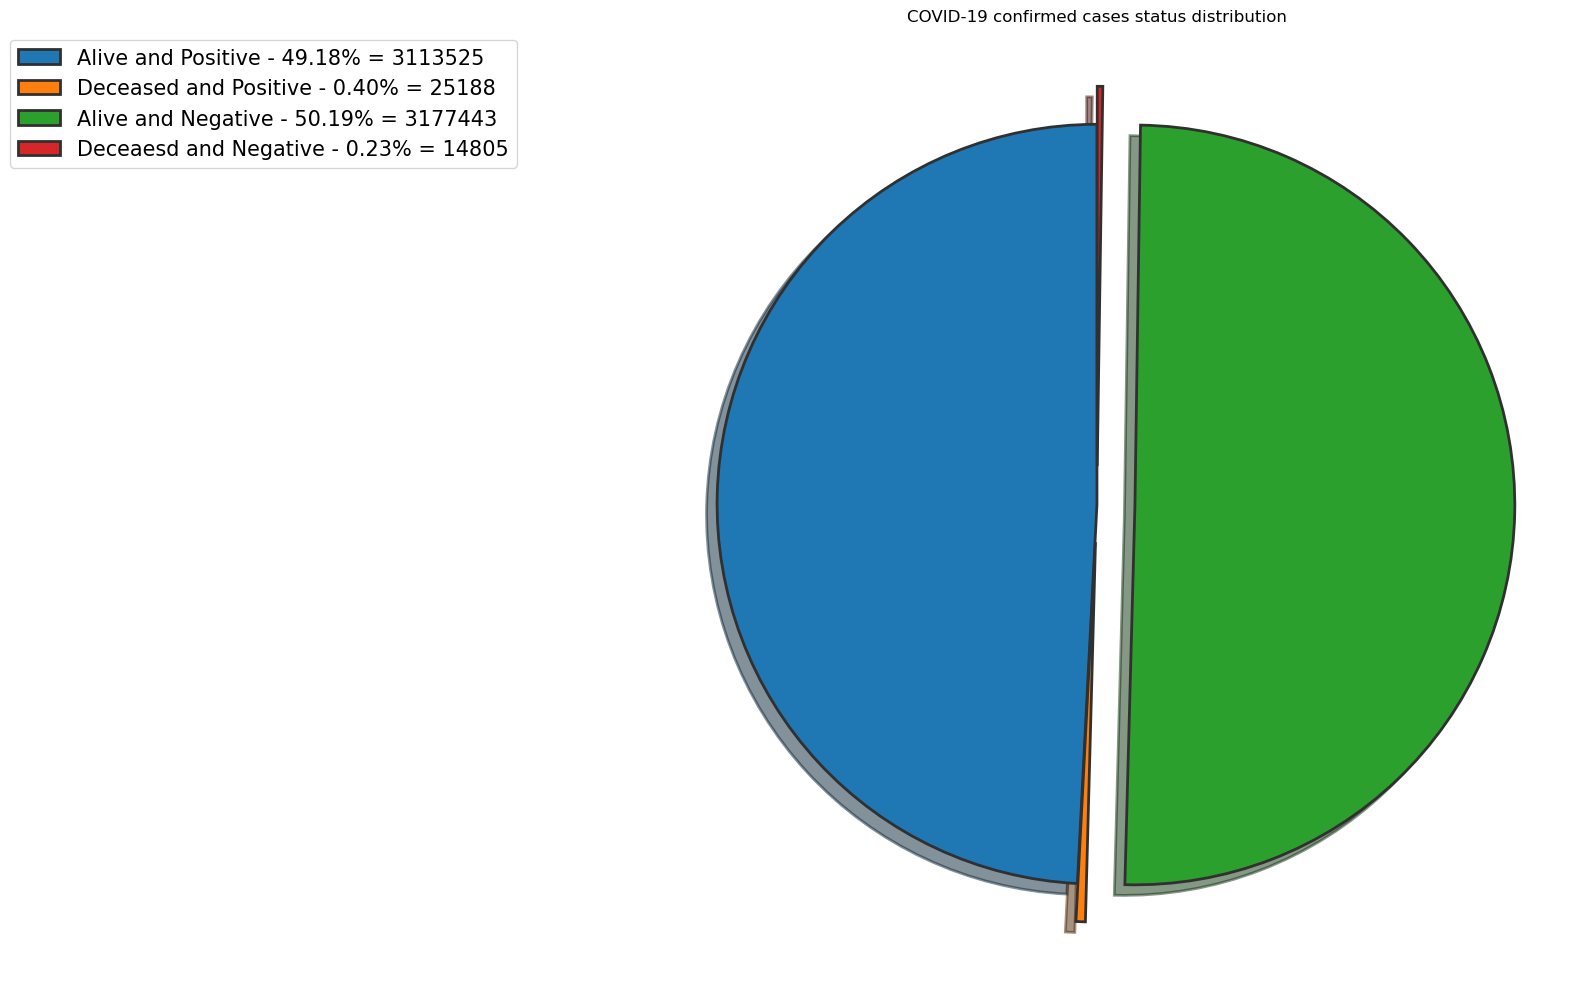

In [61]:
#Positive for COVID - Alive 
alive_positive = df2.loc[(df2['COVID'] == 1) & (df2['Date Died'] == '9999-99-99') & (df2['Date Died'].notnull())]
#Positive for COVID - Dead
dead_positive = df2.loc[(df2['COVID'] == 1) & (df2['Date Died'] != '9999-99-99') & (df2['Date Died'].notnull())]
#Negative for COVID - Alive 
alive_negative = df2.loc[(df2['COVID'] == 2 ) & (df2['Date Died'] == '9999-99-99') & (df2['Date Died'].notnull())]
#Negative for COVID - Dead
dead_negative = df2.loc[(df2['COVID'] == 2) & (df2['Date Died'] != '9999-99-99') & (df2['Date Died'].notnull())]

apcount = len(alive_positive)
dpcount = len(dead_positive)
ancount = len(alive_negative)
dncount = len(dead_negative)

# Plot
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title('COVID-19 confirmed cases status distribution')
patches, texts = ax1.pie(sizes, startangle=90, shadow=True, explode=(0.0,0.1,0.1,0.1),
                         wedgeprops={'linewidth': 2,"edgecolor":"#303030", 'linestyle': 'solid', 'antialiased': True})

porcent = 100.*sizes/sizes.sum()
tags = ['Alive and Positive', 'Deceased and Positive', 'Alive and Negative', 'Deceaesd and Negative']
labels = ['{0} - {1:0.2f}% = {2:0.0f}'.format(tags[x],porcent[x],sizes[x]) for x in range(len(tags))]

ax1.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=15)
fig.tight_layout()

In [48]:
#How many patients in the ICU that dont have COVID
patientICU = df2.loc[(df2['ICU'] == 1) &(df2['COVID'] == 2) & (df2['Date Died'] == '9999-99-99') & (df2['Date Died'].notnull())]
len(patientICU)

4405

Text(0, 0.5, 'Residence Entity')

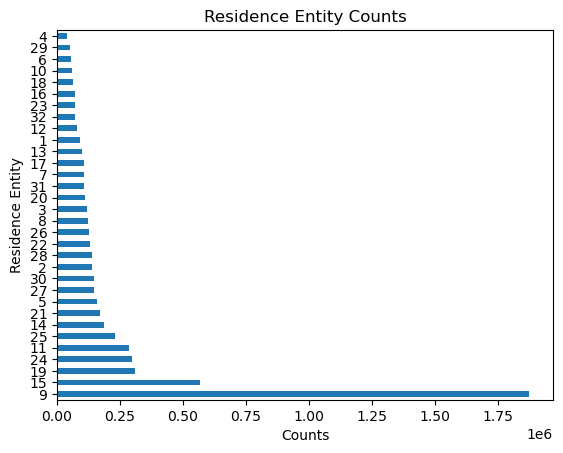

In [100]:
df2['Residence Entity'].value_counts().plot(kind='barh')
plt.title('Residence Entity Counts')
plt.xlabel('Counts')
plt.ylabel('Residence Entity')

Text(0, 0.5, 'Count')

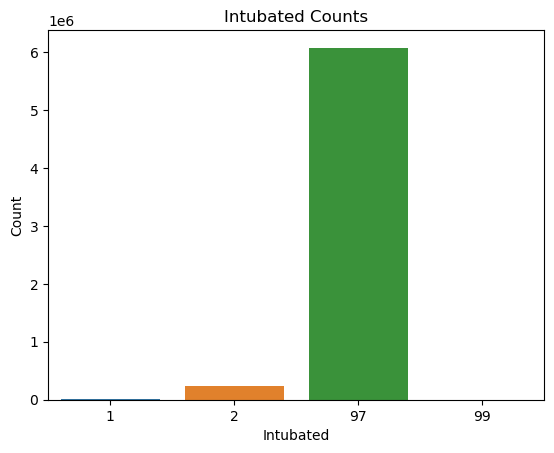

In [82]:
#Intubated
sns.barplot(x=df2.Intubated.value_counts().index, y=df2.Intubated.value_counts())
plt.title('Intubated Counts')
plt.xlabel('Intubated')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

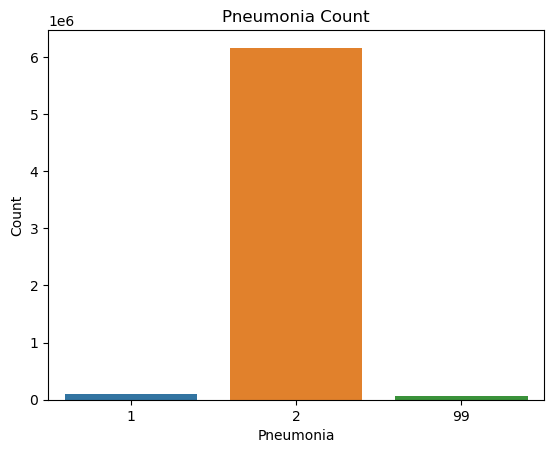

In [83]:
#Pneumonia
sns.barplot(x=df2.Pneumonia.value_counts().index, y=df2.Pneumonia.value_counts())
plt.title('Pneumonia Count')
plt.xlabel('Pneumonia')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

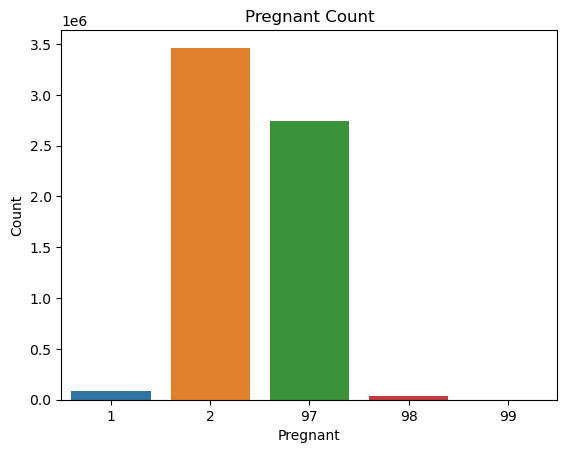

In [84]:
#Pregnant
sns.barplot(x=df2.Pregnant.value_counts().index, y=df2.Pregnant.value_counts())
plt.title('Pregnant Count')
plt.xlabel('Pregnant')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

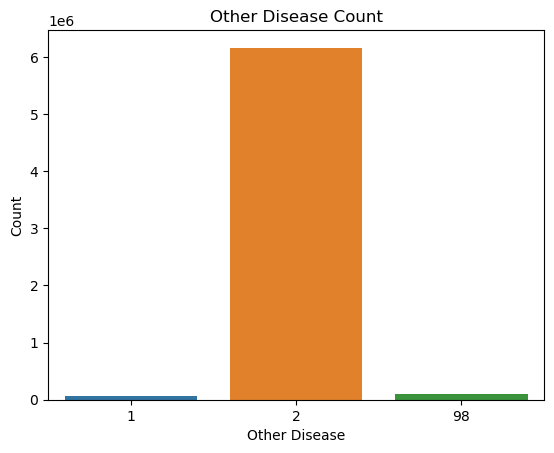

In [85]:
#Other Disease
sns.barplot(x=df2['Other Disease'].value_counts().index, y=df2['Other Disease'].value_counts())
plt.title('Other Disease Count')
plt.xlabel('Other Disease')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

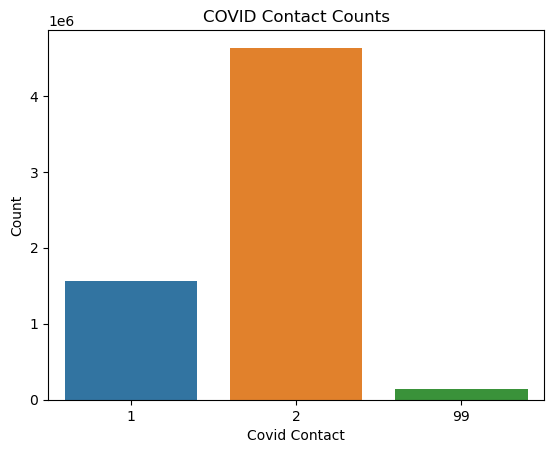

In [87]:
#COVID Contact
sns.barplot(x=df2['COVID Contact'].value_counts().index, y=df2['COVID Contact'].value_counts())
plt.title('COVID Contact Counts')
plt.xlabel('Covid Contact')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

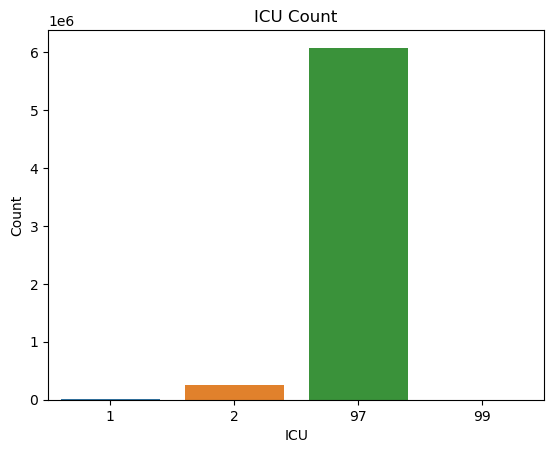

In [88]:
#'ICU'
sns.barplot(x=df2.ICU.value_counts().index, y=df2.ICU.value_counts())
plt.title('ICU Count')
plt.xlabel('ICU')
plt.ylabel('Count')